In [1]:
import pandas as pd 
import numpy as np 
from stephentools import get_file
from stephentools import data_d3
from stephentools import analyse_feature_importance
from stephentools import visualize_decision_tree
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")
import itertools
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt     
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score

In [2]:
df = get_file()
df,X,y,X_train, X_test, y_train, y_test=data_d3()
df

,height,weight,insurance,immigrant,contacts_count,house_count,public_transport_count,worried,covid19_positive,covid19_symptoms,...,smoking_quit5,smoking_vape,smoking_yesheavy,smoking_yeslight,smoking_yesmedium,working_home,working_never,working_stopped,working_travel critical,working_travel non critical
0,184,80,True,True,8,5,0,4,True,False,...,0,0,0,0,0,0,0,1,0,0
1,164,84,True,True,8,1,0,4,True,False,...,0,0,0,0,0,0,0,1,0,0
2,170,64,True,True,10,1,0,4,True,False,...,0,0,0,0,0,0,0,1,0,0
3,132,124,True,True,8,10,0,4,True,False,...,1,0,0,0,0,0,0,1,0,0
4,184,118,True,True,8,3,0,4,True,True,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5106,166,66,True,True,1,2,0,4,False,False,...,0,0,0,0,0,0,1,0,0,0
5107,168,70,True,False,2,3,0,4,False,False,...,0,0,0,0,0,0,1,0,0,0
5108,182,82,True,True,3,3,0,4,False,False,...,0,0,0,0,0,0,1,0,0,0
5109,184,80,True,True,0,3,0,3,False,False,...,0,0,0,0,0,0,0,1,0,0


In [3]:
from sklearn.preprocessing import StandardScaler

# initialise a standard scaler object
scaler = StandardScaler()

# visualise min, max, mean and standard dev of data before scaling
print("Before scaling\n-------------")
for i in range(5):
    col = X_train[:,i]
    print("Variable #{}: min {}, max {}, mean {:.2f} and std dev {:.2f}".
          format(i, min(col), max(col), np.mean(col), np.std(col)))

# learn the mean and std.dev of variables from training data
# then use the learned values to transform training data
X_train = scaler.fit_transform(X_train, y_train)

print("After scaling\n-------------")
for i in range(5):
    col = X_train[:,i]
    print("Variable #{}: min {}, max {}, mean {:.2f} and std dev {:.2f}".
          format(i, min(col), max(col), np.mean(col), np.std(col)))

# use the statistic that you learned from training to transform test data
# NEVER learn from test data, this is supposed to be a set of dataset
# that the model has never seen before
X_test = scaler.transform(X_test)

Before scaling
-------------
Variable #0: min 110, max 238, mean 172.00 and std dev 11.02
Variable #1: min 44, max 180, mean 83.95 and std dev 23.09
Variable #2: min False, max True, mean 0.89 and std dev 0.32
Variable #3: min False, max True, mean 0.90 and std dev 0.30
Variable #4: min 0, max 21, mean 7.67 and std dev 6.59
After scaling
-------------
Variable #0: min -5.625120281694435, max 5.987618252760311, mean -0.00 and std dev 1.00
Variable #1: min -1.7302276307520672, max 4.160339787787595, mean 0.00 and std dev 1.00
Variable #2: min -2.8015675054876827, max 0.3569430320851307, mean 0.00 and std dev 1.00
Variable #3: min -2.954072029412807, max 0.33851578094346463, mean 0.00 and std dev 1.00
Variable #4: min -1.1642618892696195, max 2.022130266045912, mean -0.00 and std dev 1.00


### 1. Build a regression model using the default regression method with all inputs. Build another one with GridSearchCV and choose a better model

In [4]:
from sklearn.linear_model import LogisticRegression
modeldef= LogisticRegression(random_state=42)

# fit it to training data
modeldef.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [5]:
# training and test accuracy
print("Train accuracy:", modeldef.score(X_train, y_train))
print("Test accuracy:", modeldef.score(X_test, y_test))

# classification report on test data
y_pred = modeldef.predict(X_test)   
print(classification_report(y_test, y_pred))


Train accuracy: 0.8233186328555678
Test accuracy: 0.7902899527983817
              precision    recall  f1-score   support

       False       0.80      0.89      0.84       940
        True       0.76      0.62      0.68       543

    accuracy                           0.79      1483
   macro avg       0.78      0.75      0.76      1483
weighted avg       0.79      0.79      0.79      1483



In [6]:
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Confusion Matrix : 
[[834 106]
 [205 338]]


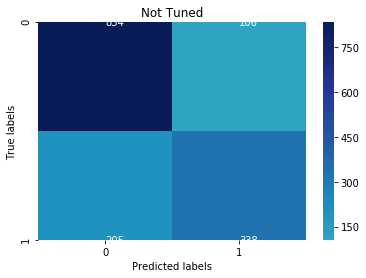

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt     
annot_kws = {"ha": 'left'}
cm=confusion_matrix(y_test,y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True,cmap="YlGnBu", ax = ax,fmt='g',annot_kws=annot_kws,center=5 ); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Not Tuned'); 

In [20]:
modeldef_coefficient=modeldef.coef_

rs=42

In [9]:
feature_names = X.columns
coef = modeldef.coef_[0]

    

In [10]:
b=pd.DataFrame(coef)
b=b.T
a=list(X.columns)
np.array(a)
a=pd.DataFrame(a)
a=a.T
z=pd.concat([a,b])
z.columns = z.iloc[0]
z = z[1:]
z=z[z>0.4]
z.dropna(axis=1)

,covid19_symptoms,income_med,working_travel critical
0,0.935214,0.471447,0.481072


##### Another Model with hyperparameter tuning

In [11]:
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

preprocess = FeatureUnion([('pca', PCA()), ("kbest", SelectKBest(k=1))])

pipe = Pipeline([('preprocess', preprocess), ('classifier', LogisticRegression())])

# Create space of candidate values
search_space = [{'preprocess__pca__n_components': [1, 2, 3],
                 'classifier__penalty': ['l1', 'l2'],
                 'classifier__C': np.logspace(0, 10, 10)}]

In [12]:
clf = GridSearchCV(pipe, search_space,return_train_score=True, cv=10, verbose=0, n_jobs=-1)

In [13]:
best_model = clf.fit(X_train, y_train)

In [14]:
# View best hyperparameters
print('Best Number Of Princpal Components:', best_model.best_estimator_.get_params()['preprocess__pca__n_components'])
print('Best Penalty:', best_model.best_estimator_.get_params()['classifier__penalty'])
print('Best C:', best_model.best_estimator_.get_params()['classifier__C'])

Best Number Of Princpal Components: 3
Best Penalty: l2
Best C: 10000000000.0


In [15]:
new_model=LogisticRegression(C=166.81005372000593,penalty = 'l1',random_state=42, n_jobs=-1)

In [16]:
new_model.fit(X_train,y_train)

LogisticRegression(C=166.81005372000593, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=-1, penalty='l1',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
# training and test accuracy
print("Train accuracy:", new_model.score(X_train, y_train))
print("Test accuracy:", new_model.score(X_test, y_test))

# classification report on test data
y_pred = new_model.predict(X_test)
print(classification_report(y_test, y_pred))
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Train accuracy: 0.8233186328555678
Test accuracy: 0.7902899527983817
              precision    recall  f1-score   support

       False       0.80      0.89      0.84       940
        True       0.76      0.62      0.68       543

    accuracy                           0.79      1483
   macro avg       0.78      0.75      0.76      1483
weighted avg       0.79      0.79      0.79      1483

Confusion Matrix : 
[[834 106]
 [205 338]]


Total number of models:  60


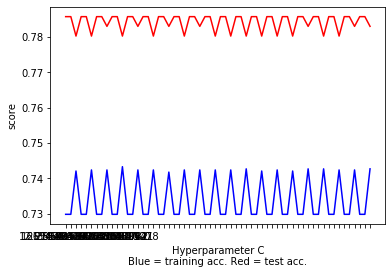

In [18]:
result_set_new = clf.cv_results_
import matplotlib.pyplot as plt
train_result_new = result_set_new['split0_train_score']
test_result_new = result_set_new['split0_test_score']
print("Total number of models: ", len(test_result_new))
# plot Hyperparameter C values vs training and test accuracy score
plt.plot(range(0, len(train_result_new)), train_result_new, 'b', range(0,len(test_result_new)), test_result_new, 'r')
plt.xlabel('Hyperparameter C\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result_new)),np.logspace(0, 10, 10))
plt.ylabel('score')
plt.show()

In [21]:
new_coefficient=new_model.coef_


### <font color='red'>3rd model<font/>

In [69]:
# 3rd grid search CV
params = {'C': [pow(10, x) for x in range(-6, 4)]}

# use all cores to tune logistic regression with C parameter
cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs),return_train_score=True, cv=10, n_jobs=-1)
cv.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10,
                               100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

Total number of models:  10


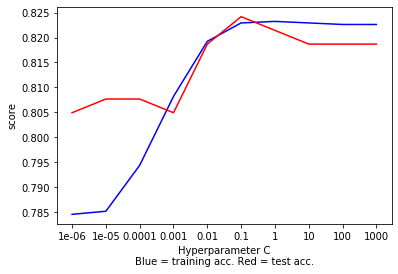

In [72]:
result_set = cv.cv_results_
import matplotlib.pyplot as plt
train_result = result_set['split0_train_score']
test_result = result_set['split0_test_score']
print("Total number of models: ", len(test_result))
# plot Hyperparameter C values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter C\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),[pow(10, x) for x in range(-6, 4)])
plt.ylabel('score')
plt.show()

Total number of models:  10


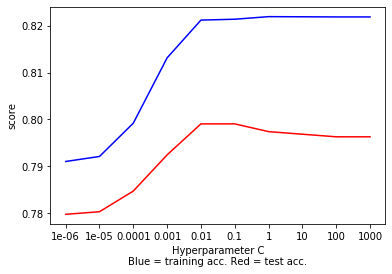

In [73]:
import matplotlib.pyplot as plt

train_result = result_set['mean_train_score']
test_result = result_set['mean_test_score']
print("Total number of models: ", len(test_result))
# plot Hyperparameter C values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter C\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),[pow(10, x) for x in range(-6, 4)])
plt.ylabel('score')
plt.show()

In [24]:
print(cv.best_params_)

{'C': 0.01}


In [25]:
cv.fit(X_train, y_train)
y_pred=cv.predict(X_test)
print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))

Train accuracy: 0.8222160970231532
Test accuracy: 0.784895482130816


In [26]:
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Confusion Matrix : 
[[825 115]
 [204 339]]


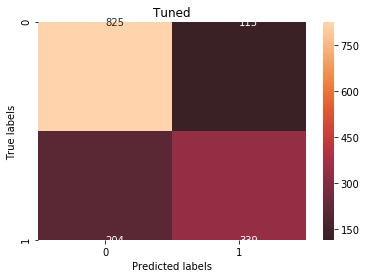

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt     
annot_kws = {"ha": 'left'}
cm=confusion_matrix(y_test,y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt='g',annot_kws=annot_kws,center=5 ); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Tuned'); 

## 2. Perform Dimensionality Reduction with Recursive Feature Elimination. Tune the model with GridSearcchCV to find best parameter setting:

In [28]:
from sklearn.feature_selection import RFECV

rfe = RFECV(estimator = LogisticRegression(random_state=42), cv=10)
rfe.fit(X_train, y_train) # run the RFECV

# comparing how many variables before and after
print("Original feature set", X_train.shape[1])
print("Number of features after elimination", rfe.n_features_)

Original feature set 166
Number of features after elimination 97


In [55]:
X_train_sel = rfe.transform(X_train)
X_test_sel = rfe.transform(X_test)
# grid search CV
params = {'C': np.logspace(0, 10, 10)}

rfe_cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=42), return_train_score=True,cv=10, n_jobs=-1)
rfe_cv.fit(X_train_sel, y_train)

# test the best model
print("Train accuracy:", rfe_cv.score(X_train_sel, y_train))
print("Test accuracy:", rfe_cv.score(X_test_sel, y_test))

y_pred = rfe_cv.predict(X_test_sel)
print(classification_report(y_test, y_pred))

# print parameters of the best model
print(rfe_cv.best_params_)


Train accuracy: 0.8205622932745315
Test accuracy: 0.7909642616318274
              precision    recall  f1-score   support

       False       0.80      0.89      0.84       940
        True       0.76      0.62      0.69       543

    accuracy                           0.79      1483
   macro avg       0.78      0.76      0.76      1483
weighted avg       0.79      0.79      0.79      1483

{'C': 12.91549665014884}


## Overfitting a regression model is similar to the example above. The problems occur when you try to estimate too many parameters from the sample. Each term in the model forces the regression analysis to estimate a parameter using a fixed sample size. Therefore, the size of your sample restricts the number of terms that you can safely add to the model before you obtain erratic estimates.

Total number of models:  15


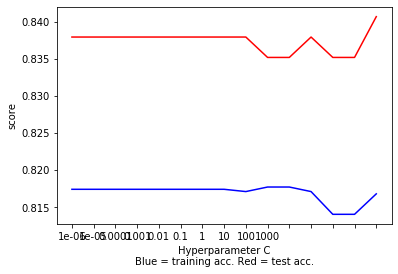

In [66]:
import matplotlib.pyplot as plt

train_result = result_set['mean_train_score']
test_result = result_set['mean_test_score']
print("Total number of models: ", len(test_result))
# plot Hyperparameter C values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter C\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),[pow(10, x) for x in range(-6, 4)])
plt.ylabel('score')
plt.show()

In [58]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
b = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0,return_train_score=True)

In [64]:
modelnum3=b.fit(X_train_sel, y_train)

In [65]:
print("Train accuracy:", modelnum3.score(X_train_sel, y_train))
print("Test accuracy:", modelnum3.score(X_test_sel, y_test))

y_pred = modelnum3.predict(X_test_sel)

Train accuracy: 0.818632855567806
Test accuracy: 0.7882670262980445


In [67]:
modelnum3.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}

# 3. Produce ROC curve: 

In [42]:
y_pred_proba_dt_rfe = rfe_cv.predict_proba(X_test_sel)
roc_index_lr_rfe = roc_auc_score(y_test.values.reshape(-1,1), rfe_cv.predict(X_test_sel))
roc_index_lr_def = roc_auc_score(y_test.values.reshape(-1,1), modeldef.predict(X_test))
roc_index_lr_cv = roc_auc_score(y_test.values.reshape(-1,1), cv.predict(X_test))


print("ROC index on test for DT_rfe:", roc_index_lr_rfe)
print("ROC index on test for DT_def:", roc_index_lr_def)
print("ROC index on test for DT_cv:", roc_index_lr_cv)

ROC index on test for DT_rfe: 0.7557717174091925
ROC index on test for DT_def: 0.7548509070961169
ROC index on test for DT_cv: 0.7509844833666393


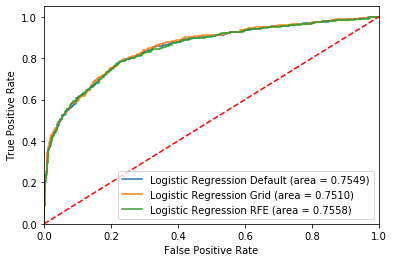

In [43]:
fpr_lr_cv, tpr_lr_cv, threshold_lr_cv = roc_curve(y_test, rfe_cv.predict_proba(X_test_sel)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, modeldef.predict_proba(X_test)[:,1])
fpr1, tpr1, thresholds1 = roc_curve(y_test, cv.predict_proba(X_test)[:,1])


plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression Default (area = %0.4f)'%roc_index_lr_def)
plt.plot(fpr1, tpr1, label='Logistic Regression Grid (area = %0.4f)'%roc_index_lr_cv)
plt.plot(fpr_lr_cv, tpr_lr_cv, label='Logistic Regression RFE (area = %0.4f)'%roc_index_lr_rfe)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

**<font color=red> As we can see that all three models provide a good prediction of the results of patients' situation, sharing the nearly same numbers of accuracy points for training set and test set. However, the ROC graph reveals that Green (representing for RFE model) is slightly doing better by 9% compared to the other two. Therefore, we will use RFE as our best model for this project </font>**

#### b. Produce results of predictions: 

In [44]:
prediction=rfe_cv.predict(X_test_sel)
prediction=pd.Series(prediction)
o = df.drop('covid19_positive',axis=1)
v = df['covid19_positive']
from sklearn.model_selection import train_test_split
Big,Test, real, actual =train_test_split(o, v, test_size=0.29, stratify=y, random_state=rs) 

In [45]:
Test['Real'] = actual

Test['Prediction'] = prediction

### Can you provide general characteristics of those patients? 

In [46]:
char = Test.loc[Test['Prediction']==1]
char=char.drop('Real',axis=1)


char.to_excel('generalizationforLogisticRegression_true.xlsx', 'r')
char

,height,weight,insurance,immigrant,contacts_count,house_count,public_transport_count,worried,covid19_symptoms,covid19_contact,...,smoking_vape,smoking_yesheavy,smoking_yeslight,smoking_yesmedium,working_home,working_never,working_stopped,working_travel critical,working_travel non critical,Prediction
0,184,80,True,True,8,5,0,4,False,False,...,0,0,0,0,0,0,1,0,0,True
342,170,78,True,True,6,2,0,4,False,False,...,0,0,0,0,0,1,0,0,0,True
1475,184,94,True,True,3,2,0,4,False,False,...,0,0,0,0,0,0,0,1,0,True
136,166,108,True,True,5,5,0,4,True,True,...,0,0,0,0,0,0,1,0,0,True
82,122,54,True,True,5,4,0,4,True,True,...,0,0,0,0,0,0,0,1,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,166,130,True,True,4,4,0,4,False,False,...,0,0,0,0,0,0,1,0,0,True
817,166,180,True,True,5,4,0,4,True,True,...,0,0,0,0,0,1,0,0,0,True
1399,148,92,True,True,4,2,0,4,True,True,...,0,0,0,0,0,0,1,0,0,True
374,188,114,True,True,6,2,0,4,False,False,...,0,0,0,0,0,1,0,0,0,True


In [48]:
z = pd.read_excel(r'generalizationforLogisticRegression_true.xlsx')

In [49]:
import seaborn as sns

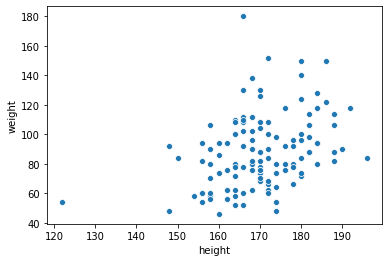

In [50]:
sns.scatterplot(data=z, x="height", y="weight")

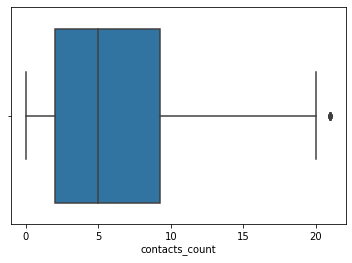

In [52]:
sns.boxplot(data=z, x="contacts_count")

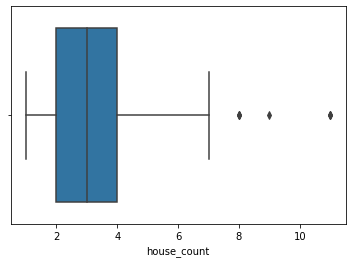

In [54]:
sns.boxplot(data=z, x="house_count")

## Draft

In [ ]:
np.sort(coef)

In [ ]:
b=pd.DataFrame(coef)
b=b.T
X.drop(0, axis=1, inplace=True)
a=list(X.columns)
np.array(a)
a=pd.DataFrame(a)
a=a.T
z=pd.concat([a,b])
z.columns = z.iloc[0]
z = z[1:]
z

#### 3rd grid

In [ ]:
modeldf= LogisticRegression(C=2,random_state=42, penalty='l2')

# fit it to training data
modeldf.fit(X_train, y_train)
print("Train accuracy:", modeldf.score(X_train, y_train))
print("Test accuracy:", modeldf.score(X_test, y_test))


In [ ]:
z